- Hàm y = Ax + B.
- Ví dụ: giả sử chúng ta có một công ty ô tô. Nếu giá xe xuống thấp, chúng ta sẽ bán được nhiều xe hơn. Nếu giá xe tăng cao, ta bán được ít xe hơn. Đây là thực tế mà chúng ta biết và chúng ta có dữ liệu về điều này.
- Câu hỏi đặt ra là làm sao để ước lượng được số xe ta sẽ bán được khi mà giá xe là 100.

In [6]:
# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
import numpy as np

warnings.filterwarnings("ignore")

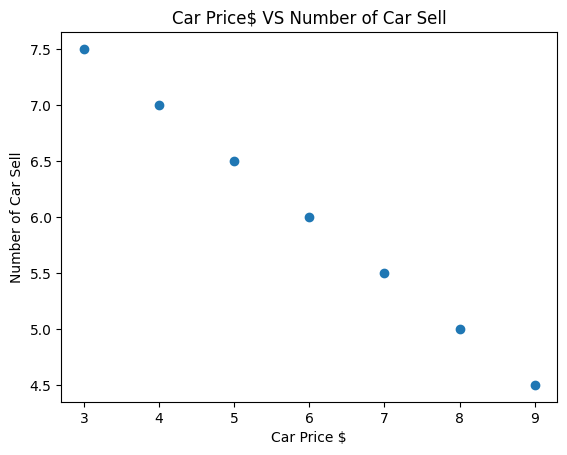

In [7]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 15.13427734375
epoch 50, loss 5.259791374206543
epoch 100, loss 3.554260730743408
epoch 150, loss 2.401763677597046
epoch 200, loss 1.6229724884033203
epoch 250, loss 1.0967105627059937
epoch 300, loss 0.7410931587219238
epoch 350, loss 0.5007868409156799
epoch 400, loss 0.3384033143520355
epoch 450, loss 0.22867293655872345
epoch 500, loss 0.15452395379543304
epoch 550, loss 0.10441798716783524
epoch 600, loss 0.0705597773194313
epoch 650, loss 0.04768049716949463
epoch 700, loss 0.03221973404288292
epoch 750, loss 0.021772131323814392
epoch 800, loss 0.014712204225361347
epoch 850, loss 0.009941600263118744
epoch 900, loss 0.006718140561133623
epoch 950, loss 0.0045398022048175335
epoch 1000, loss 0.003067707410082221


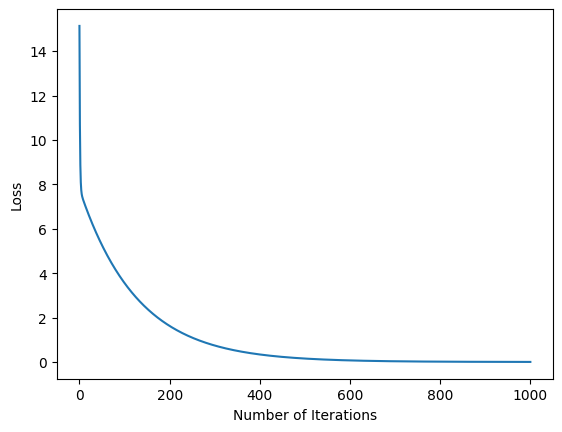

In [5]:


# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


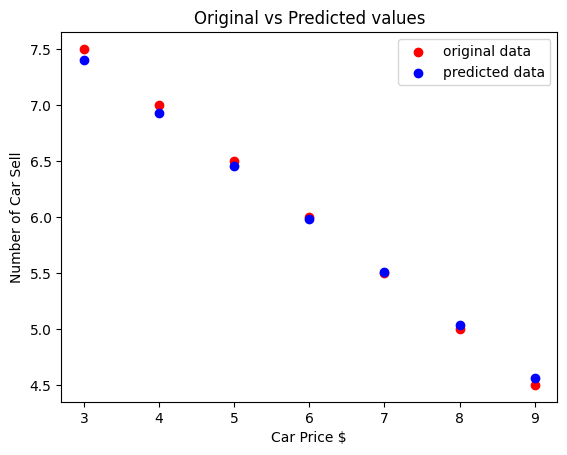

In [8]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()